In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

In [82]:
X_train = pd.read_csv('X_train_w_ID.csv', index_col=0)

In [83]:
X_train.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
108760,FABE2225CCA6687C,1,1,17,2,1,1,1,2,2,...,0.100000,12.000000,205.333333,2.866667,0.933333,62.666667,0.133333,5.0,689.000000,3
2466,05B5098CD9428B74,1,1,45,2,2,2,2,2,2,...,3.400000,239.000000,93.000000,1.266667,0.333333,15.666667,0.066667,26.0,358.000000,4
65436,96C29CAA899C844A,1,1,34,1,2,1,2,2,2,...,0.066667,0.333333,95.666667,1.166667,0.333333,34.666667,0.000000,0.0,1796.000000,2
58670,8714B39696A95F03,0,2,49,2,1,2,2,2,1,...,2.100000,124.000000,354.666667,2.866667,0.866667,119.666667,0.066667,14.0,492.666667,3
99259,E52B6FA3304235DE,1,1,41,2,2,2,2,2,2,...,0.166667,9.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.333333,4


In [84]:
X_test = pd.read_csv('X_test_w_ID.csv', index_col = 0)

In [85]:
Y_train = pd.read_csv('Y_train.csv', index_col = 0, header= None, names = ['Y'])
Y_test = pd.read_csv('Y_test.csv', index_col = 0, header= None, names = ['Y'])

In [86]:
Y_train.head()

,Y
108760,0
2466,0
65436,0
58670,0
99259,0


In [87]:
Y_test.head()

,Y
18227,0
109987,1
100222,0
28805,0
90037,0


In [88]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BENE_SEX_IDENT_CD,83270.0,0.557620,0.496672,0.000000,0.000000,1.000000,1.000000,1.000000
BENE_RACE_CD,83270.0,1.283596,0.752646,1.000000,1.000000,1.000000,1.000000,5.000000
SP_STATE_CODE,83270.0,25.715684,15.500928,1.000000,11.000000,25.000000,39.000000,54.000000
SP_ALZHDMTA,83270.0,1.831572,0.374248,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CHF,83270.0,1.742380,0.437326,1.000000,1.000000,2.000000,2.000000,2.000000
SP_CHRNKIDN,83270.0,1.861535,0.345390,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CNCR,83270.0,1.948781,0.220445,1.000000,2.000000,2.000000,2.000000,2.000000
SP_COPD,83270.0,1.911180,0.284485,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DEPRESSN,83270.0,1.822097,0.382434,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DIABETES,83270.0,1.708839,0.454300,1.000000,1.000000,2.000000,2.000000,2.000000


In [89]:
#prevent data leakage
train_X = X_train.drop(['DESYNPUF_ID'], axis=1)
test_X = X_test.drop(['DESYNPUF_ID'], axis=1)

In [90]:
#Add Y variable for data analysis
train_X['Y'] = Y_train

In [91]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
18227,1,1,32,2,2,2,2,2,2,1,...,2.533333,176.000000,437.666667,3.366667,1.033333,123.000000,0.466667,42.333333,656.000000,2
109987,0,1,23,2,2,1,2,2,2,1,...,1.111111,70.000000,148.148148,1.555556,0.555556,45.185185,0.074074,0.740741,218.888889,2
100222,0,1,1,2,2,2,2,2,2,2,...,2.100000,119.333333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,119.333333,2
28805,1,1,1,2,2,2,1,2,2,1,...,0.166667,15.000000,181.000000,2.133333,0.600000,38.000000,0.900000,180.000000,509.333333,3
90037,1,1,22,2,2,2,2,2,2,2,...,1.000000,34.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.666667,3


Variable descriptions:

Sex_Ident: 1 = Male, 2= Female
Race: 1 = White, 2 = Black, 3 = Others, 4 = Hispanic
Binary variables: 1 = Yes, 2 = No 


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


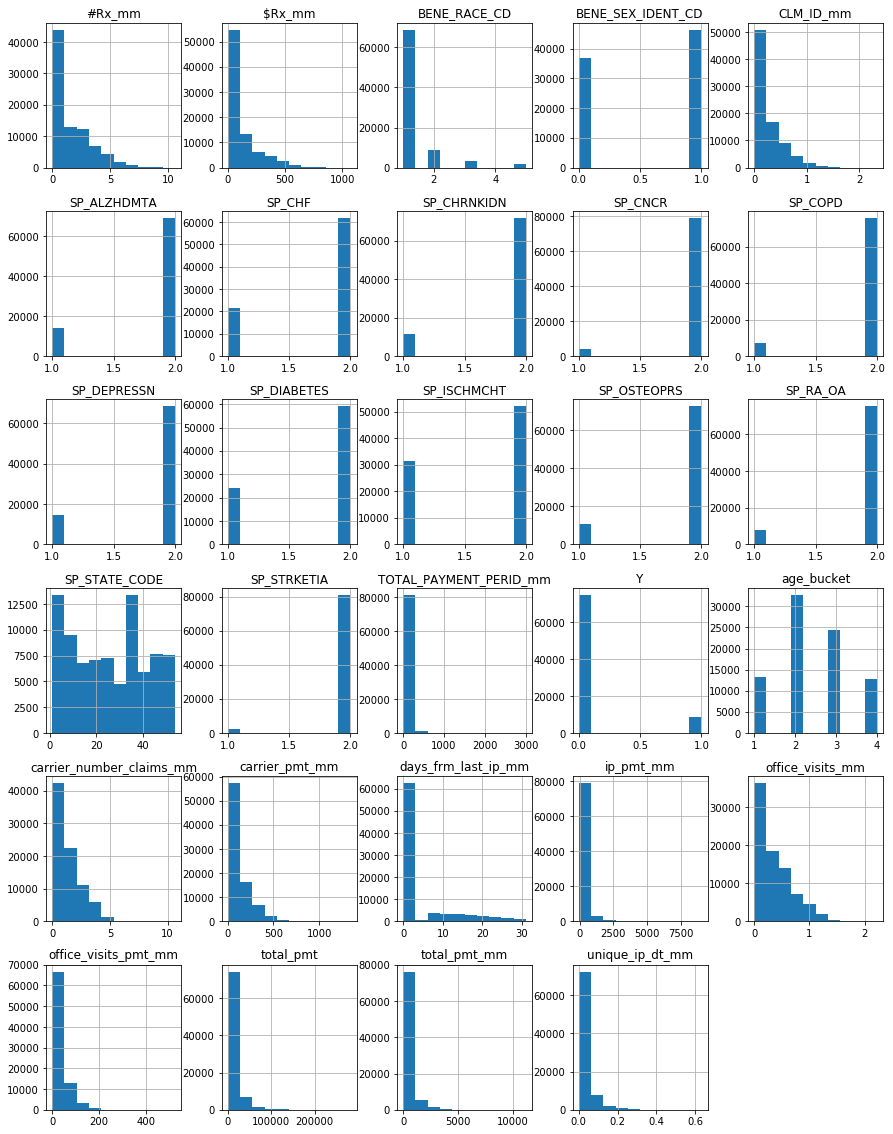

In [92]:
#Plot histograms of all features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_X.hist(ax = ax)
plt.show()

In [93]:
#Correlations with target variable
c_mat = train_X.corr()
print(c_mat['Y'].sort_values(ascending=False))

Y                           1.000000
unique_ip_dt_mm             0.467534
carrier_number_claims_mm    0.207132
office_visits_mm            0.192528
carrier_pmt_mm              0.187217
office_visits_pmt_mm        0.162643
CLM_ID_mm                   0.156892
total_pmt_mm                0.122365
TOTAL_PAYMENT_PERID_mm      0.109662
$Rx_mm                      0.071504
#Rx_mm                      0.063966
ip_pmt_mm                   0.056868
total_pmt                   0.038114
age_bucket                  0.019778
BENE_SEX_IDENT_CD           0.010152
SP_STATE_CODE               0.000400
BENE_RACE_CD               -0.019699
days_frm_last_ip_mm        -0.040139
SP_OSTEOPRS                -0.095478
SP_RA_OA                   -0.096613
SP_CNCR                    -0.099043
SP_STRKETIA                -0.133298
SP_DEPRESSN                -0.145832
SP_ALZHDMTA                -0.161622
SP_CHF                     -0.219932
SP_ISCHMCHT                -0.220215
SP_DIABETES                -0.228515
S

In [94]:
train_X.Y.groupby(train_X.BENE_RACE_CD).sum()

BENE_RACE_CD
1    7318
2     826
3     299
5     160
Name: Y, dtype: int64

Because our features show 2 for not having the disease, the correlations revealed a positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

Outside of the condition features, number of inpatient hospitalizations had the strongest correlation with the target variable at 0.47%. Having been hospitalized in the past leads to a higher likelihood of hospitalization in the future.

Number of carrier claims have a 20% correlation with hospitalization.

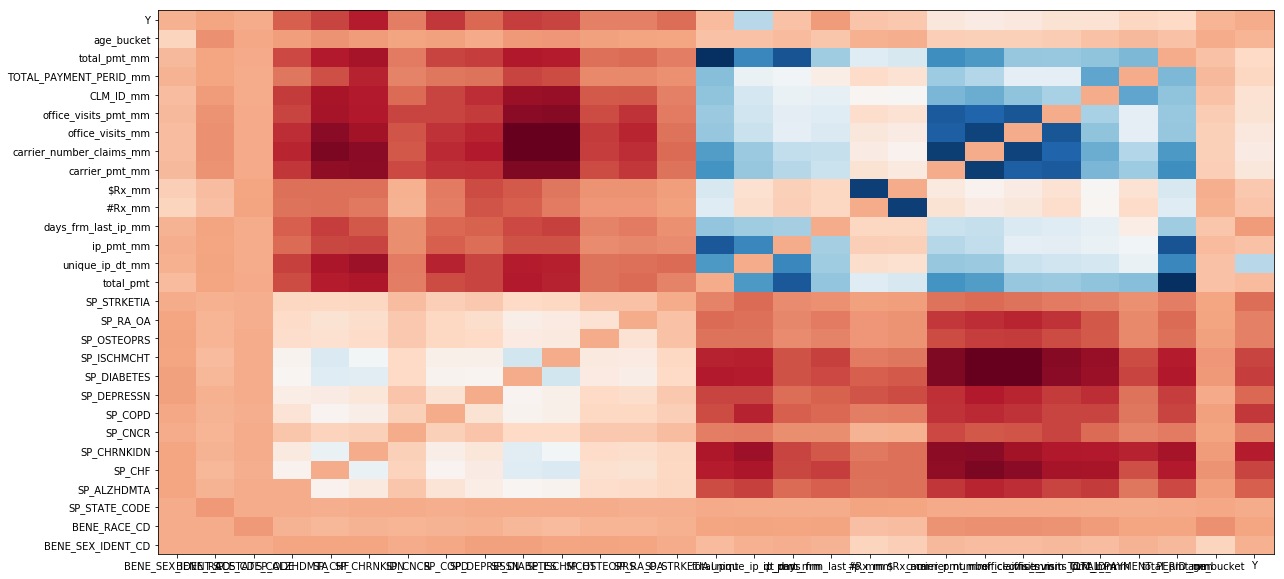

In [95]:
#Visualize correlations. Red signifies the strongest negative correlations

for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0
 
    
fig, ax = plt.subplots(figsize = (20,10))
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

heatmap.set_label('Pearson Correlation')

plt.show()

In [96]:
#Normalize features

import sklearn.preprocessing as sk

labels = train_X.drop('Y', axis=1).columns
index = train_X.index

norm = pd.DataFrame(sk.scale(train_X.drop('Y', axis=1)), columns = labels, index = index)
#norm['Y'] =  working_data['Y']

index1 = test_X.index
norm_test = pd.DataFrame(sk.scale(test_X), columns = labels, index = index1)

norm.describe() 

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
count,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,...,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04,8.327000e+04
mean,-1.502482e-15,-1.345211e-15,4.152263e-16,-1.533689e-15,4.504304e-15,7.125260e-16,-2.265424e-16,1.894231e-15,-3.342982e-15,-6.041485e-15,...,-2.636590e-16,-7.228116e-17,-9.561011e-16,7.465053e-16,-1.294124e-15,-1.405465e-15,1.352248e-15,9.157707e-17,1.486715e-16,5.136411e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.122719e+00,-3.768003e-01,-1.594474e+00,-2.221993e+00,-1.697554e+00,-2.494400e+00,-4.303955e+00,-3.202934e+00,-2.149659e+00,-1.560296e+00,...,-8.799929e-01,-7.373782e-01,-8.788331e-01,-1.030247e+00,-1.036661e+00,-8.420175e-01,-8.526110e-01,-4.507565e-01,-7.172007e-01,-1.547396e+00
25%,-1.122719e+00,-3.768003e-01,-9.493478e-01,4.500463e-01,-1.697554e+00,4.008981e-01,2.323444e-01,3.122137e-01,4.651900e-01,-1.560296e+00,...,-8.405972e-01,-7.166639e-01,-8.104890e-01,-9.224542e-01,-9.379484e-01,-8.044596e-01,-8.526110e-01,-4.319499e-01,-5.753452e-01,-4.764968e-01
50%,8.906945e-01,-3.768003e-01,-4.617067e-02,4.500463e-01,5.890829e-01,4.008981e-01,2.323444e-01,3.122137e-01,4.651900e-01,6.409042e-01,...,-3.788339e-01,-4.784486e-01,-2.873942e-01,-1.948528e-01,-1.905560e-01,-3.179751e-01,-3.531173e-01,-2.956026e-01,-3.300186e-01,-4.764968e-01
75%,8.906945e-01,-3.768003e-01,8.570065e-01,4.500463e-01,5.890829e-01,4.008981e-01,2.323444e-01,3.122137e-01,4.651900e-01,6.409042e-01,...,6.170444e-01,3.650867e-01,3.934176e-01,5.866450e-01,6.414468e-01,4.067825e-01,5.209968e-01,9.698388e-02,1.867805e-01,5.944024e-01
max,8.906945e-01,4.937815e+00,1.824696e+00,4.500463e-01,5.890829e-01,4.008981e-01,2.323444e-01,3.122137e-01,4.651900e-01,6.409042e-01,...,5.390492e+00,6.658420e+00,9.692358e+00,7.564811e+00,5.544153e+00,1.395579e+01,7.888529e+00,2.078108e+01,1.791638e+01,1.665302e+00


In [97]:
norm.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
108760,0.890694,-0.376800,-0.562272,0.450046,-1.697554,-2.494400,-4.303955,0.312214,0.465190,-1.560296,...,-0.820899,-0.654521,0.740395,1.287298,1.727281,0.923204,-0.353117,-0.396688,0.432663,0.594402
2466,0.890694,-0.376800,1.244082,0.450046,0.589083,0.400898,0.232344,0.312214,0.465190,-1.560296,...,1.129189,0.912867,-0.145449,-0.006215,-0.049539,-0.400712,-0.602864,-0.248586,-0.119739,1.665302
65436,0.890694,-0.376800,0.534443,-2.221993,0.589083,-2.494400,0.232344,0.312214,0.465190,-1.560296,...,-0.840597,-0.735077,-0.124420,-0.087060,-0.049539,0.134488,-0.852611,-0.431950,2.280123,-0.476497
58670,-1.122719,0.951854,1.502133,0.450046,-1.697554,0.400898,0.232344,0.312214,-2.149659,0.640904,...,0.360972,0.118816,1.918016,1.287298,1.529857,2.528804,-0.602864,-0.333216,0.105005,0.594402
99259,0.890694,-0.376800,0.986032,0.450046,0.589083,0.400898,0.232344,0.312214,0.465190,0.640904,...,-0.781504,-0.672934,-0.878833,-1.030247,-1.036661,-0.842017,-0.852611,-0.431950,-0.701624,1.665302


In [98]:
#Split dataset into testing and training

#train_Y = norm.pop('Y')
train_X = norm
test_X = norm_test

test_Y = Y_test
train_Y = Y_train



In [99]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
18227,0.893355,-0.377191,0.402214,0.44732,0.590761,0.402508,0.236816,0.31316,0.471591,-1.558495,...,0.613958,0.470932,2.583837,1.692794,2.029566,2.646028,0.902002,-0.128640,0.390360,-0.483330
109987,-1.119376,-0.377191,-0.175516,0.44732,0.590761,-2.484422,0.236816,0.31316,0.471591,-1.558495,...,-0.223791,-0.255345,0.292237,0.226493,0.610690,0.437542,-0.572468,-0.423009,-0.353821,-0.483330
100222,-1.119376,-0.377191,-1.587746,0.44732,0.590761,0.402508,0.236816,0.31316,0.471591,0.641645,...,0.358706,0.082671,-0.880387,-1.005919,-0.940176,-0.844873,-0.850670,-0.428252,-0.523314,-0.483330
28805,0.893355,-0.377191,-1.587746,0.44732,0.590761,0.402508,-4.222685,0.31316,0.471591,-1.558495,...,-0.780109,-0.632186,0.552267,0.694270,0.742678,0.233617,2.529483,0.845686,0.140660,0.583192
90037,0.893355,-0.377191,-0.239709,0.44732,0.590761,0.402508,0.236816,0.31316,0.471591,0.641645,...,-0.289240,-0.497437,-0.880387,-1.032906,-1.039167,-0.844873,-0.850670,-0.428252,-0.667458,0.583192


In [100]:
#Base Rate: predicting negative all the time
share_non_target = train_Y[train_Y.Y == 0].shape[0]/train_Y.shape[0]

base_rate = share_non_target

print('Base rate of forecast represented by always predicting not being hospitalized is: ', str(base_rate))

Base rate of forecast represented by always predicting not being hospitalized is:  0.8966854809655338


In [101]:
train_X.isnull().any()

BENE_SEX_IDENT_CD           False
BENE_RACE_CD                False
SP_STATE_CODE               False
SP_ALZHDMTA                 False
SP_CHF                      False
SP_CHRNKIDN                 False
SP_CNCR                     False
SP_COPD                     False
SP_DEPRESSN                 False
SP_DIABETES                 False
SP_ISCHMCHT                 False
SP_OSTEOPRS                 False
SP_RA_OA                    False
SP_STRKETIA                 False
total_pmt                   False
unique_ip_dt_mm             False
ip_pmt_mm                   False
days_frm_last_ip_mm         False
#Rx_mm                      False
$Rx_mm                      False
carrier_pmt_mm              False
carrier_number_claims_mm    False
office_visits_mm            False
office_visits_pmt_mm        False
CLM_ID_mm                   False
TOTAL_PAYMENT_PERID_mm      False
total_pmt_mm                False
age_bucket                  False
dtype: bool

In [102]:
train_Y.shape[0]

83270

In [103]:
train_X.shape[0]

83270

In [104]:
#Let's test features with a decision tree

from sklearn import tree

#Create a Decision Tree instance
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Train decision tree
clf.fit(train_X, train_Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [105]:
labels = train_X.columns
labels

Index(['BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'total_pmt', 'unique_ip_dt_mm', 'ip_pmt_mm', 'days_frm_last_ip_mm',
       '#Rx_mm', '$Rx_mm', 'carrier_pmt_mm', 'carrier_number_claims_mm',
       'office_visits_mm', 'office_visits_pmt_mm', 'CLM_ID_mm',
       'TOTAL_PAYMENT_PERID_mm', 'total_pmt_mm', 'age_bucket'],
      dtype='object')

[  9.14679869e-05   9.35684665e-05   4.98961980e-04   2.38884220e-04
   1.21609304e-04   1.58445046e-04   1.16366496e-04   0.00000000e+00
   5.00990696e-05   3.52161621e-04   6.90086504e-05   2.89032082e-04
   1.75599775e-04   0.00000000e+00   3.65779561e-02   6.82612527e-01
   9.59489880e-04   2.61192866e-01   7.66896653e-04   3.48815935e-04
   7.43346598e-04   2.28040143e-03   1.54775936e-03   9.64865158e-04
   6.44273366e-04   1.33191432e-03   7.59018973e-03   1.83493407e-04]


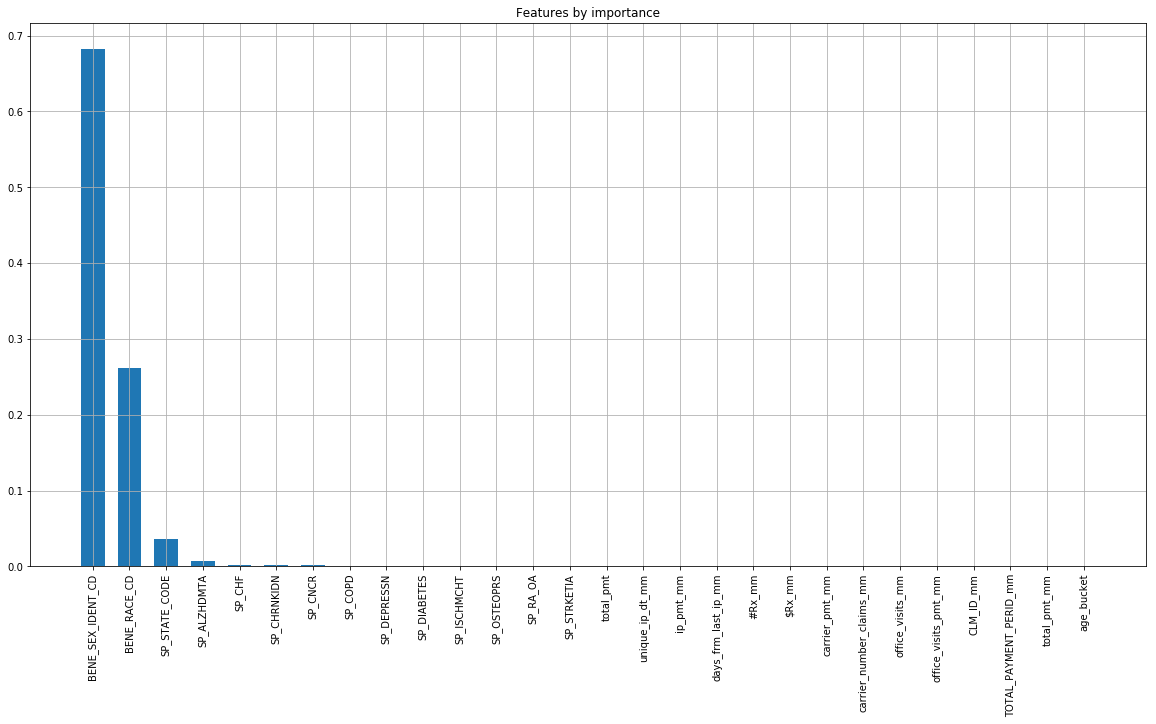

In [106]:
#Visualize feature importance
import matplotlib.pyplot as plt
%matplotlib inline

importances = clf.feature_importances_
#print(len(importances))

labels = train_X.columns

assert(len(importances) == len(labels))

print(importances)

#Sort and order importances in descending order
importances.sort()
importances = importances[::-1]

N = len(importances)
xx = np.linspace(0, 1, N)
plt.figure(figsize=(20,10))
plt.bar(xx, importances, width=1/N/1.5)
plt.xticks(xx, labels, rotation='vertical')
plt.title('Features by importance')

plt.grid(True)

In [107]:
from sklearn import metrics

#Predicting train_df
fcst_train = clf.predict(train_X)

#Predicting test_df
fcst_test = clf.predict(test_X)

train_accuracy = clf.score(train_X, train_Y)
test_accuracy = clf.score(test_X, test_Y)

print('Train accuracy:',train_accuracy, '\nTest accuracy:', test_accuracy, '\nDifference:', 
     train_accuracy - test_accuracy)

Train accuracy: 1.0 
Test accuracy: 0.998270706488 
Difference: 0.00172929351155


In [108]:
#Tune the decision tree by testing hyperparameters
min_samples_split_values = np.linspace(200, 1000, 10, dtype = int)
min_samples_leaf_values = np.linspace(50, 200, 10, dtype = int)

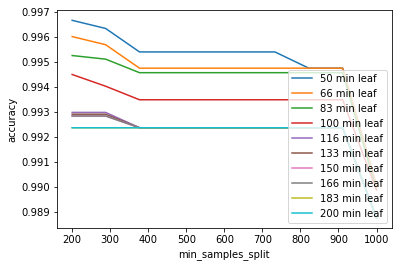

In [109]:
import matplotlib.pyplot as plt

for leaf in min_samples_leaf_values:
    accuracy = []
    
    for split in min_samples_split_values:
        
        clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
        
        clf.fit(train_X, train_Y)
        
        fcst_tests = clf.predict(test_X)
        
        accuracy.append(metrics.accuracy_score(test_Y, fcst_tests))
 
    plt.plot(min_samples_split_values, accuracy, label = str(leaf) + ' min leaf')
    plt.xlabel('min_samples_split')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

In [110]:
index_max_accuracy = accuracy.index(max(accuracy))

best_samples_split = min_samples_split_values[index_max_accuracy]
best_min_leaf = min_samples_leaf_values[index_max_accuracy]
best_accuracy = accuracy[index_max_accuracy]

print('Best Min Samples Split: ' + str(best_samples_split) + '\nBest Min Leaf: ' + str(best_min_leaf) 
      + '\nBest Accuracy: ' + str(best_accuracy))

Best Min Samples Split: 200
Best Min Leaf: 50
Best Accuracy: 0.992362286991


In [111]:
#We beat the base rate
print('{0:.5f}'.format((best_accuracy - base_rate)))

0.09568


In [118]:
fcst_tests.transpose()

array([0, 1, 0, ..., 0, 0, 0])

#### Conclusion

Conclusion: I analyzed demographics and health features for predicting hospitalization in the next 6 months. 
Correlation analysis revealed the strongest positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

Decision tree analysis uncovered the strongest non-linear relationships with such factors as Age, Gender, and Race.

We defined the base rate to be the share of all patients who weren't hospitalized in the next 6 months. The base rate is very high at around 90%. The decision tree could not outperform the base rate implying we need a different model and probably more inputs. 

Next I will look into inputs varying over time such as hospital visits and medication intake in the 6 months prior to hospitalization.